# Loan Default Prediction

# Import Module

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import train_test_split as tts #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

# Load Data

In [2]:
Loan=pd.read_csv('LoansTrainingSet.csv')

/Users/SKYLER/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Description
   This file contains 

# Data Preprocessing

Let's Quickly look how data looks like & what changes we need to do

In [3]:
Loan=Loan.rename(columns=lambda x:x.replace(' ','_'))

In [4]:
Loan.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job             object
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                     object
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit              object
Bankruptcies                    float64
Tax_Liens                       float64
dtype: object

In [5]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan_ID                         256984 non-null object
Customer_ID                     256984 non-null object
Loan_Status                     256984 non-null object
Current_Loan_Amount             256984 non-null int64
Term                            256984 non-null object
Credit_Score                    195308 non-null float64
Years_in_current_job            256984 non-null object
Home_Ownership                  256984 non-null object
Annual_Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly_Debt                    256984 non-null object
Years_of_Credit_History         256984 non-null float64
Months_since_last_delinquent    116601 non-null float64
Number_of_Open_Accounts         256984 non-null int64
Number_of_Credit_Problems       256984 non-null int64
Current_Credit_Balance          256984 non-null int64
Maximum_O

In [6]:
Loan.isnull().sum()

Loan_ID                              0
Customer_ID                          0
Loan_Status                          0
Current_Loan_Amount                  0
Term                                 0
Credit_Score                     61676
Years_in_current_job                 0
Home_Ownership                       0
Annual_Income                    61676
Purpose                              0
Monthly_Debt                         0
Years_of_Credit_History              0
Months_since_last_delinquent    140383
Number_of_Open_Accounts              0
Number_of_Credit_Problems            0
Current_Credit_Balance               0
Maximum_Open_Credit                  0
Bankruptcies                       529
Tax_Liens                           23
dtype: int64

So, we can see that there are null values for columns Credit_Score, Annual_Income, Months_since_last_delinquent,
Bankruptcies & Tax_Liens

# Seprating Object column & Make new data frame

In [7]:
df_object=[]
for col in Loan.columns:
    if Loan[col].dtype==np.object:
        df_object.append(col)
df_object

['Loan_ID',
 'Customer_ID',
 'Loan_Status',
 'Term',
 'Years_in_current_job',
 'Home_Ownership',
 'Purpose',
 'Monthly_Debt',
 'Maximum_Open_Credit']

In [8]:
cols=['Loan_ID','Customer_ID','Loan_Status','Term','Home_Ownership','Purpose']
rem_cols = ['Loan_ID','Current_Loan_Amount','Credit_Score','Years_in_current_job',
            'Annual_Income','Monthly_Debt','Years_of_Credit_History','Months_since_last_delinquent',
            'Number_of_Open_Accounts','Number_of_Credit_Problems','Current_Credit_Balance','Maximum_Open_Credit','Bankruptcies','Tax_Liens']

In [9]:
rem_cols

['Loan_ID',
 'Current_Loan_Amount',
 'Credit_Score',
 'Years_in_current_job',
 'Annual_Income',
 'Monthly_Debt',
 'Years_of_Credit_History',
 'Months_since_last_delinquent',
 'Number_of_Open_Accounts',
 'Number_of_Credit_Problems',
 'Current_Credit_Balance',
 'Maximum_Open_Credit',
 'Bankruptcies',
 'Tax_Liens']

In [10]:
Loan['Monthly_Debt']= Loan['Monthly_Debt'].str.replace(',','').map(lambda x: x[1:]).astype('float')

In [11]:
Loan['Years_in_current_job'] = Loan['Years_in_current_job'].str.strip('+ years')
Loan['Years_in_current_job'] = Loan['Years_in_current_job'].replace('< 1', 0)
Loan['Years_in_current_job'] = Loan['Years_in_current_job'].replace('n/', 0)
Loan['Years_in_current_job'] = Loan['Years_in_current_job'].astype('float64')

In [12]:
Loan['Maximum_Open_Credit']= Loan['Maximum_Open_Credit'].replace('#VALUE!',0).astype('float64')

In [13]:
#a=Loan['Loan_ID'].value_counts()
#repeat_df = Loan[Loan['Loan_ID'].isin(a[a>1].index)]
#unique_df = Loan.ix[list(set(Loan.index) - set(repeat_df.index))]

In [14]:
#c=Loan['Loan_ID'].value_counts()
#repeat_df = Loan[Loan['Loan_ID'].isin(c[c>1].index)]
#unique_df = Loan.ix[list(set(Loan.index) - set(repeat_df.index))]

In [15]:
a=Loan['Loan_ID'].value_counts()
repeat_df = Loan[Loan['Loan_ID'].isin(a[a>1].index)]

In [16]:
repeat_df.shape

(80464, 19)

In [17]:
repeat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80464 entries, 6 to 256982
Data columns (total 19 columns):
Loan_ID                         80464 non-null object
Customer_ID                     80464 non-null object
Loan_Status                     80464 non-null object
Current_Loan_Amount             80464 non-null int64
Term                            80464 non-null object
Credit_Score                    61075 non-null float64
Years_in_current_job            80464 non-null float64
Home_Ownership                  80464 non-null object
Annual_Income                   61075 non-null float64
Purpose                         80464 non-null object
Monthly_Debt                    80464 non-null float64
Years_of_Credit_History         80464 non-null float64
Months_since_last_delinquent    37326 non-null float64
Number_of_Open_Accounts         80464 non-null int64
Number_of_Credit_Problems       80464 non-null int64
Current_Credit_Balance          80464 non-null int64
Maximum_Open_Credit     

In [18]:
unique_df = Loan.ix[list(set(Loan.index) - set(repeat_df.index))]

/Users/SKYLER/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [19]:
unique_df.shape, repeat_df.shape

((176520, 19), (80464, 19))

In [20]:
unique_df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,other,1106.04,26.3,NaN,17,0,6262,19149.0,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0


In [21]:
c=repeat_df[cols]

In [22]:
c.shape

(80464, 6)

In [23]:
c.Loan_ID.value_counts()

bbde3b1b-bba8-4721-a5a7-44caef34cd9a    4
68e55709-e534-4d63-8c22-f025b052fe50    4
1f2e8a5e-a191-4c09-b749-298825dec764    4
64a69ecc-607d-4840-a093-e651da6ce830    4
26950f0b-bb37-4e17-a86f-52c6d01db2aa    4
de31127c-e891-42f8-9fdd-cf8bbfcda6ec    4
bdefba89-b59c-416b-9d21-d4b1aced6533    4
3c275ed7-1f5e-4693-b8cc-350e120e1718    4
c4a4c234-355d-4aac-835d-a3ea84fe0ba6    4
9aa5a9c3-eb3d-4c4d-b8a6-8cf5b18d4b28    4
3021285b-49a7-46d8-b9f5-07c030521e7b    4
fe052871-6cfb-4e14-84a1-2e7ab999ab9e    4
65602505-7fdb-45dc-af2f-4820718025cf    4
80bf6f56-b3f3-41d8-bb26-191ead5a8a4c    4
054909cf-95d1-4031-b253-875c95c0624a    4
96c68c2d-439e-4978-be81-565ce4226c72    4
0ff281c9-ee30-4fba-a993-8408437ed498    4
9a50f293-6497-4a16-9bac-43c45a055934    4
2f7500e8-695a-4d4d-b91c-bdfaedb06745    4
3e29597b-23b4-4cf2-8db0-c2df22091403    4
d1177e5a-5127-46da-bff0-718d8e66c125    4
8a036c7c-9836-4763-8f69-980b23e3f381    4
445c3b21-316c-48e2-ae59-468652453660    4
9d2f69fe-2035-4ef9-b3a8-614d7ef446

In [24]:
d=repeat_df[rem_cols]

In [25]:
d.shape

(80464, 14)

In [26]:
d.head()

,Loan_ID,Current_Loan_Amount,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,24613,6640.0,6.0,49225.0,542.29,17.6,73.0,7,0,14123,16954.0,0.0,0.0
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,24613,NaN,6.0,NaN,542.29,17.6,73.0,7,0,14123,16954.0,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,17980,NaN,0.0,NaN,597.50,9.9,43.0,7,0,6817,22800.0,0.0,0.0
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,17961,701.0,0.0,53053.0,596.85,9.9,43.0,7,0,6810,22775.0,0.0,0.0
14,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,17961,701.0,0.0,53053.0,596.85,9.9,43.0,7,0,6810,22775.0,0.0,0.0


In [27]:
c.head()

,Loan_ID,Customer_ID,Loan_Status,Term,Home_Ownership,Purpose
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,Long Term,Rent,Business Loan
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,Long Term,Rent,Business Loan
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,Short Term,Own Home,Debt Consolidation
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,Short Term,Own Home,Debt Consolidation
14,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,Short Term,Own Home,Debt Consolidation


In [28]:
c=c.drop_duplicates()

In [29]:
c.shape

(39180, 6)

In [30]:
d=d.groupby('Loan_ID').mean()

In [31]:
d=d.reset_index(0)

In [32]:
d.shape

(39180, 14)

In [33]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39180 entries, 0 to 39179
Data columns (total 14 columns):
Loan_ID                         39180 non-null object
Current_Loan_Amount             39180 non-null float64
Credit_Score                    36969 non-null float64
Years_in_current_job            39180 non-null float64
Annual_Income                   36969 non-null float64
Monthly_Debt                    39180 non-null float64
Years_of_Credit_History         39180 non-null float64
Months_since_last_delinquent    18163 non-null float64
Number_of_Open_Accounts         39180 non-null float64
Number_of_Credit_Problems       39180 non-null float64
Current_Credit_Balance          39180 non-null float64
Maximum_Open_Credit             39180 non-null float64
Bankruptcies                    39107 non-null float64
Tax_Liens                       39179 non-null float64
dtypes: float64(13), object(1)
memory usage: 4.2+ MB


In [34]:
c.Loan_ID.value_counts()

bcf0cbfd-ebdc-4e44-9cc6-2682e4dd9001    1
729cdd57-632e-4bb1-81a6-5eb87252000b    1
728ff34e-3458-45b0-8823-7fc25237a584    1
9f2f85bd-d831-4607-ae2b-73364ff59173    1
532f91bb-0863-4dfb-9e2e-f9e8961ff630    1
457bb082-aacc-4dea-82eb-9024dcaad5fa    1
395a6351-046c-4d3c-a2c2-f97cceba1dc5    1
578f3a58-d627-44ec-83b8-8a0248e96372    1
5f9e191b-89b9-4d4d-a8dd-1bd85f62f16a    1
9ae0a455-d6c0-41f2-8ed9-8ed75924e9ac    1
be9b375d-04a4-4b89-a8cc-f9ee8d107a74    1
cf4e2082-cf86-43ec-84d5-f10b4c4a8d2f    1
9ba6a056-2e29-4060-b233-c008ef42b509    1
3be7706b-f1db-4a17-ae0b-993e61eb2d9e    1
a33539bc-bc45-4f8a-9b61-32a728a90d56    1
fd3159d7-066f-4b5b-a8bf-bba5d7e8326a    1
91de7985-655c-4c81-a26f-da9281bd99e7    1
680fdb47-2e87-4a81-8e0c-fcf5e253a27c    1
021504f1-6476-4fd2-b055-4f1e2dcbb0c6    1
cb3981f4-61e2-4daf-b22c-7734e91c24b4    1
c132b246-bafe-4e3c-acd4-a31f80fbb706    1
ba7fa320-06fd-4378-a888-83de6bfe8b6e    1
b1385dad-5eb4-4f1f-ace4-4b13682da328    1
367a8905-fa06-458c-af82-6fc63183a2

In [35]:
clean_df=c.merge(d,on='Loan_ID')

In [36]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39180 entries, 0 to 39179
Data columns (total 19 columns):
Loan_ID                         39180 non-null object
Customer_ID                     39180 non-null object
Loan_Status                     39180 non-null object
Term                            39180 non-null object
Home_Ownership                  39180 non-null object
Purpose                         39180 non-null object
Current_Loan_Amount             39180 non-null float64
Credit_Score                    36969 non-null float64
Years_in_current_job            39180 non-null float64
Annual_Income                   36969 non-null float64
Monthly_Debt                    39180 non-null float64
Years_of_Credit_History         39180 non-null float64
Months_since_last_delinquent    18163 non-null float64
Number_of_Open_Accounts         39180 non-null float64
Number_of_Credit_Problems       39180 non-null float64
Current_Credit_Balance          39180 non-null float64
Maximum_Open_Cred

In [37]:
prep=unique_df.append(clean_df,ignore_index=True)

In [38]:
prep=pd.DataFrame(prep,columns=Loan.columns)

In [39]:
pd.isnull(prep).sum(), prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 19 columns):
Loan_ID                         215700 non-null object
Customer_ID                     215700 non-null object
Loan_Status                     215700 non-null object
Current_Loan_Amount             215700 non-null float64
Term                            215700 non-null object
Credit_Score                    171202 non-null float64
Years_in_current_job            215700 non-null float64
Home_Ownership                  215700 non-null object
Annual_Income                   171202 non-null float64
Purpose                         215700 non-null object
Monthly_Debt                    215700 non-null float64
Years_of_Credit_History         215700 non-null float64
Months_since_last_delinquent    97438 non-null float64
Number_of_Open_Accounts         215700 non-null float64
Number_of_Credit_Problems       215700 non-null float64
Current_Credit_Balance          215700 non-null float64


(Loan_ID                              0
 Customer_ID                          0
 Loan_Status                          0
 Current_Loan_Amount                  0
 Term                                 0
 Credit_Score                     44498
 Years_in_current_job                 0
 Home_Ownership                       0
 Annual_Income                    44498
 Purpose                              0
 Monthly_Debt                         0
 Years_of_Credit_History              0
 Months_since_last_delinquent    118262
 Number_of_Open_Accounts              0
 Number_of_Credit_Problems            0
 Current_Credit_Balance               0
 Maximum_Open_Credit                  0
 Bankruptcies                       452
 Tax_Liens                           22
 dtype: int64, None)

# Data Preparation

In [40]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 19 columns):
Loan_ID                         215700 non-null object
Customer_ID                     215700 non-null object
Loan_Status                     215700 non-null object
Current_Loan_Amount             215700 non-null float64
Term                            215700 non-null object
Credit_Score                    171202 non-null float64
Years_in_current_job            215700 non-null float64
Home_Ownership                  215700 non-null object
Annual_Income                   171202 non-null float64
Purpose                         215700 non-null object
Monthly_Debt                    215700 non-null float64
Years_of_Credit_History         215700 non-null float64
Months_since_last_delinquent    97438 non-null float64
Number_of_Open_Accounts         215700 non-null float64
Number_of_Credit_Problems       215700 non-null float64
Current_Credit_Balance          215700 non-null float64


In [41]:
# Loan_Status

In [42]:
prep.Loan_Status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [43]:
prep.Loan_Status.value_counts()

Fully Paid     176191
Charged Off     39509
Name: Loan_Status, dtype: int64

In [44]:
prep['Loan_Status']=prep['Loan_Status'].astype('object')

In [45]:
# Term

In [46]:
prep.Term.value_counts()

Short Term    166523
Long Term      49177
Name: Term, dtype: int64

In [47]:
prep.Term.value_counts()

Short Term    166523
Long Term      49177
Name: Term, dtype: int64

In [48]:
prep['Term']=prep['Term'].astype('object')

In [49]:
# Years_in_current_job

In [50]:
prep.Years_in_current_job.value_counts()

10.0    66711
0.0     26534
2.0     19831
3.0     17428
5.0     14987
1.0     14130
4.0     13632
6.0     12230
7.0     11713
8.0     10232
9.0      8272
Name: Years_in_current_job, dtype: int64

In [51]:
prep['Years_in_current_job']=prep['Years_in_current_job'].astype('int')

In [52]:
prep['Years_in_current_job']=prep['Years_in_current_job'].astype('object')

In [53]:
prep.Home_Ownership.value_counts()

Home Mortgage    106492
Rent              89619
Own Home          19094
HaveMortgage        495
Name: Home_Ownership, dtype: int64

In [54]:
prep['Home_Ownership']=prep['Home_Ownership'].replace('HaveMortgage','Home Mortgage')

In [55]:
prep['Home_Ownership']=prep['Home_Ownership'].astype('object')

In [56]:
prep.Tax_Liens.value_counts()

0.0     211881
1.0       2701
2.0        707
3.0        195
4.0         97
5.0         48
6.0         26
8.0          7
7.0          6
9.0          5
10.0         3
11.0         2
Name: Tax_Liens, dtype: int64

In [57]:
prep.loc[prep['Credit_Score']>800,'Credit_Score'] = prep.loc[prep['Credit_Score']>800,'Credit_Score']/10

In [58]:
prep['Current_Loan_Amount']=prep['Current_Loan_Amount'].replace(99999999,0)

In [59]:
prep.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,215700.000000,171202.000000,1.712020e+05,215700.000000,215700.000000,97438.000000,215700.000000,215700.000000,2.157000e+05,2.157000e+05,215248.000000,215678.000000
mean,11552.860810,705.726902,7.280452e+04,960.395422,18.359758,35.031949,11.077566,0.155424,1.545720e+04,3.698346e+04,0.110556,0.026331
std,9083.482632,79.778205,5.730495e+04,634.781881,7.057999,21.810714,4.971825,0.457972,1.975033e+04,6.011777e+05,0.336853,0.240853
min,0.000000,204.750000,0.000000e+00,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4888.000000,708.000000,4.476600e+04,527.680000,13.600000,17.000000,8.000000,0.000000,5.932000e+03,1.296100e+04,0.000000,0.000000
50%,10072.000000,731.000000,6.210500e+04,840.535000,17.000000,32.000000,10.000000,0.000000,1.104200e+04,2.206000e+04,0.000000,0.000000
75%,17100.000000,742.000000,8.779425e+04,1249.975000,21.800000,51.000000,14.000000,0.000000,1.932425e+04,3.681000e+04,0.000000,0.000000
max,41000.000000,751.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,11.000000,1.731412e+06,1.763322e+08,7.000000,11.000000


In [60]:
prep_credit=prep[pd.isnull(prep['Credit_Score'])]

In [61]:
prep_credit.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
6,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036.0,Short Term,NaN,5,Rent,NaN,Debt Consolidation,386.36,17.7,NaN,7.0,0.0,11970.0,16579.0,0.0,0.0
12,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228.0,Short Term,NaN,3,Home Mortgage,NaN,Debt Consolidation,439.56,17.8,NaN,13.0,1.0,8488.0,15866.0,1.0,0.0
16,0004d002-a494-4f8a-a528-a6d513812701,4722d542-6684-431c-afb6-ba2e847f1098,Fully Paid,4612.0,Short Term,NaN,10,Rent,NaN,Debt Consolidation,262.27,14.0,NaN,4.0,0.0,8919.0,9330.0,0.0,0.0
24,0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,Fully Paid,6114.0,Short Term,NaN,0,Home Mortgage,NaN,Debt Consolidation,206.97,17.8,21.0,8.0,1.0,5772.0,13975.0,1.0,0.0
37,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,7068.0,Short Term,NaN,0,Own Home,NaN,other,425.68,21.3,NaN,7.0,1.0,4178.0,6850.0,1.0,0.0


In [62]:
#loan.tot_cur_bal.isnull().sum()/loan.shape[0]

# EDA

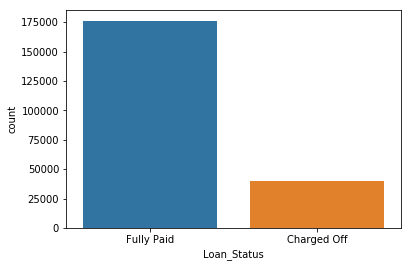

In [63]:
sns.countplot(prep['Loan_Status'])

In [64]:
prep.Loan_Status.value_counts()

Fully Paid     176191
Charged Off     39509
Name: Loan_Status, dtype: int64

In [65]:
prep.Loan_Status.value_counts()[0]/prep.Loan_Status.shape[0]

0.81683356513676397

In [161]:
prep.Loan_Status.value_counts()[1]/prep.Loan_Status.shape[0]

0.18316643486323597

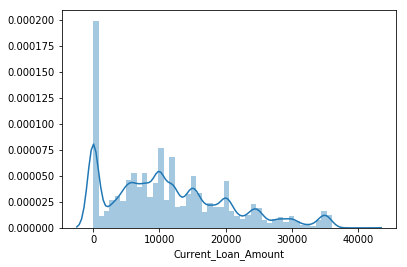

In [66]:
sns.distplot(prep["Current_Loan_Amount"])

In [67]:
prep['Current_Loan_Amount_log']=np.log(prep['Current_Loan_Amount']+1)

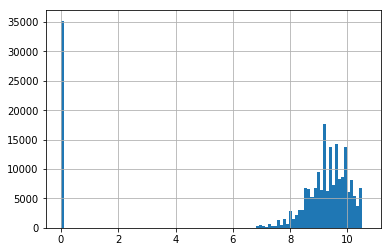

In [68]:
prep['Current_Loan_Amount_log'].hist(bins=100)

In [69]:
prep.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Current_Loan_Amount_log
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520.0,Short Term,741.0,10,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10.0,0.0,6760.0,16056.0,0.0,0.0,9.351927
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441.0,Short Term,734.0,4,Home Mortgage,42269.0,other,1106.04,26.3,NaN,17.0,0.0,6262.0,19149.0,0.0,0.0,8.143808
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029.0,Short Term,747.0,10,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5.0,0.0,20967.0,28335.0,0.0,0.0,9.953705
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743.0,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9.0,0.0,22529.0,43915.0,0.0,0.0,9.838629
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731.0,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12.0,0.0,17391.0,37081.0,0.0,0.0,9.370075


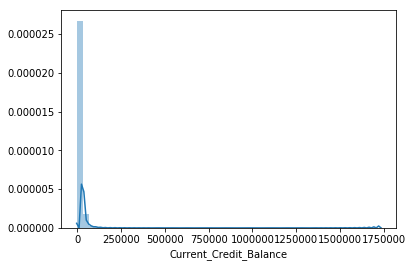

In [70]:
sns.distplot(prep["Current_Credit_Balance"])

In [71]:
import matplotlib as plt
%matplotlib inline
prep['Current_Credit_Balance_log']=np.log(prep['Current_Credit_Balance']+1)
#prep['Current_Credit_Balance_log'].hist(bins=200)

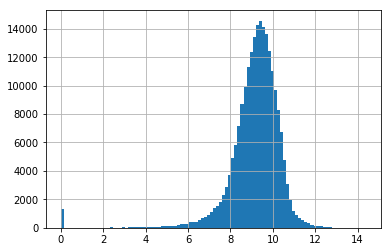

In [72]:
prep['Current_Credit_Balance_log'].hist(bins=100)

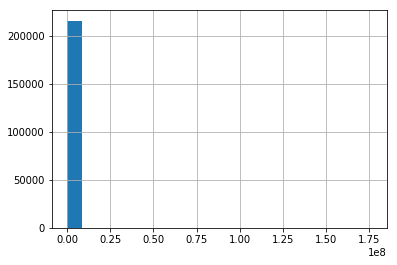

In [73]:
prep['Maximum_Open_Credit'].hist(bins=20)

In [74]:
prep['Maximum_Open_Credit_log']=np.log(prep['Maximum_Open_Credit']+1)

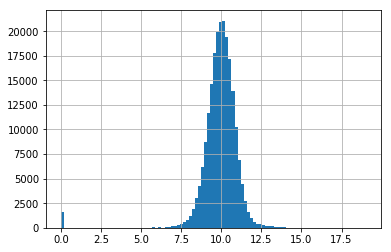

In [75]:
prep['Maximum_Open_Credit_log'].hist(bins=100)

In [76]:
list(prep.Number_of_Credit_Problems.unique())

[0.0, 1.0, 2.0, 5.0, 3.0, 4.0, 6.0, 7.0, 9.0, 10.0, 8.0, 11.0]

In [77]:
prep['Number_of_Credit_Problems']=prep['Number_of_Credit_Problems'].astype('int')

In [78]:
list(prep.Number_of_Credit_Problems.unique())

[0, 1, 2, 5, 3, 4, 6, 7, 9, 10, 8, 11]

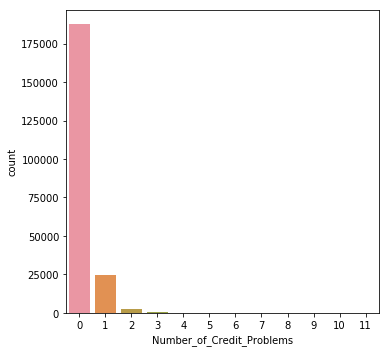

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(prep['Number_of_Credit_Problems'])
plt.tight_layout()
plt.show()

In [80]:
prep.Number_of_Credit_Problems.value_counts()

0     187484
1      24682
2       2480
3        665
4        216
5         99
6         36
7         14
8         11
10         6
9          5
11         2
Name: Number_of_Credit_Problems, dtype: int64

In [81]:
prep.Number_of_Credit_Problems.value_counts()[0]/prep.shape[0] * 100

86.918868799258235

In [82]:
prep.Number_of_Open_Accounts.unique()

array([ 10.,  17.,   5.,   9.,  12.,   4.,   7.,  11.,   8.,  13.,  14.,
        16.,  22.,  34.,   6.,  15.,   3.,  24.,   2.,  21.,  20.,  19.,
        25.,  29.,  18.,  23.,  32.,  31.,  26.,  28.,  47.,  30.,  27.,
        37.,  40.,  33.,  36.,  39.,  35.,  38.,  42.,  48.,  44.,  41.,
         1.,  56.,  43.,  53.,   0.,  46.,  49.,  45.,  55.,  52.,  51.,
        58.,  54.,  50.,  76.])

In [83]:
prep['Number_of_Open_Accounts']=prep['Number_of_Open_Accounts'].astype('int')

In [84]:
prep.Number_of_Open_Accounts.nunique()

59

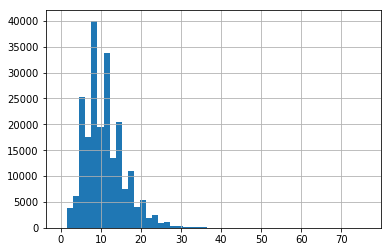

In [85]:
prep['Number_of_Open_Accounts'].hist(bins=50)

In [86]:
prep.Years_of_Credit_History.nunique()

544

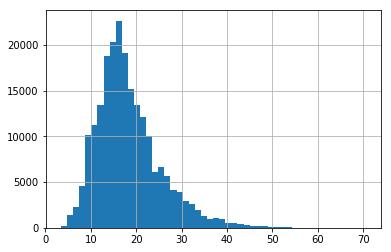

In [87]:
prep.Years_of_Credit_History.hist(bins=50)

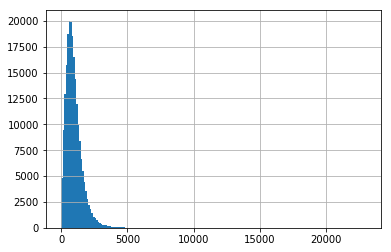

In [88]:
prep.Monthly_Debt.hist(bins=200)

In [89]:
prep['Monthly_Debt_log']=np.log(prep['Monthly_Debt']+1)

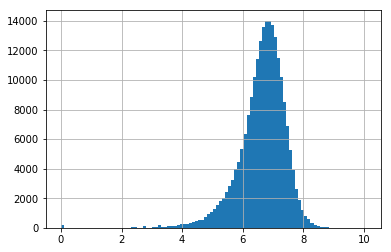

In [90]:
prep['Monthly_Debt_log'].hist(bins=100)

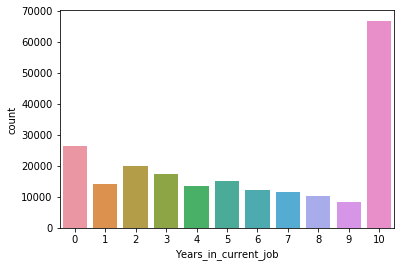

In [91]:
sns.countplot(prep['Years_in_current_job'])

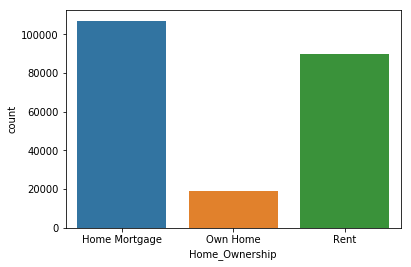

In [92]:
sns.countplot(prep['Home_Ownership'])

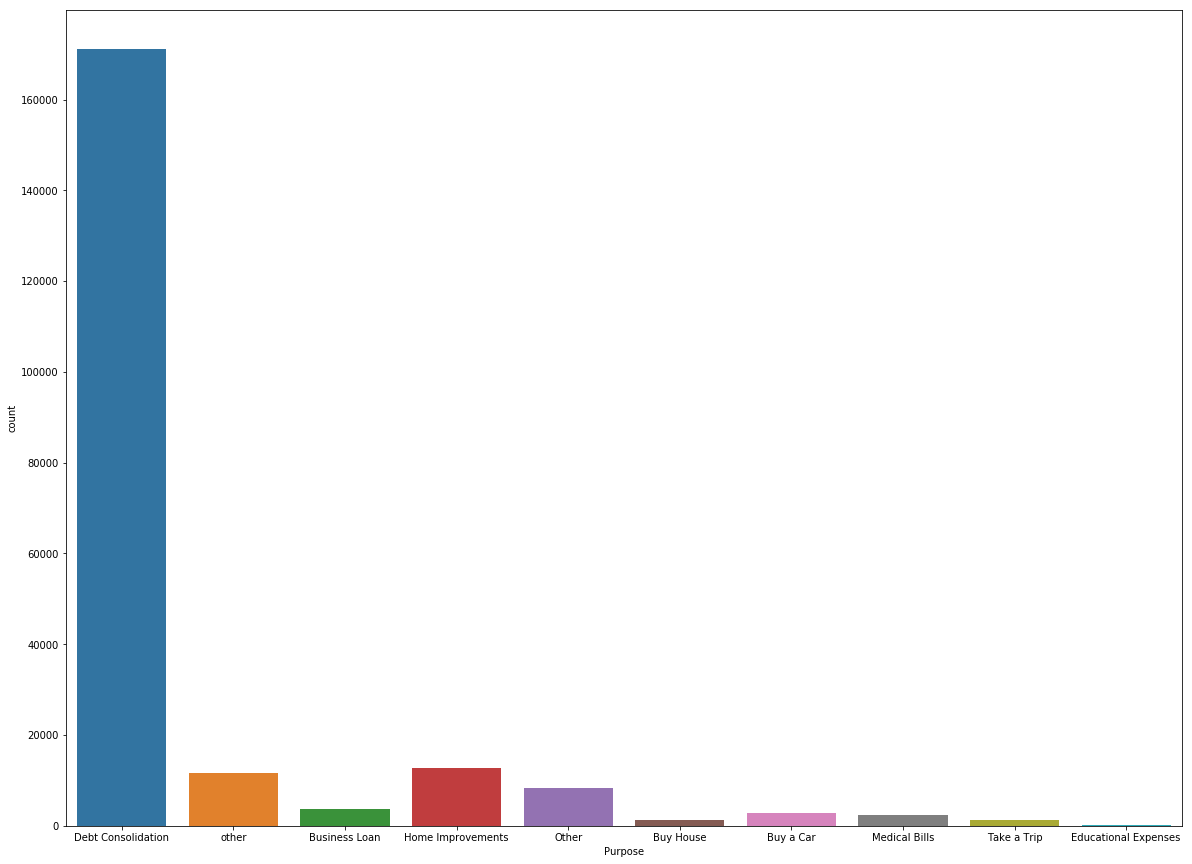

In [93]:
plt.figure(figsize=(20,15))
sns.countplot(prep['Purpose'])

In [94]:
prep.Purpose.value_counts()[0]/prep.Purpose.shape[0]

0.79321279554937418

In [95]:
# 79 % People are the one who have take loan for Debt Consolidation

In [96]:
prep.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount             float64
Term                             object
Credit_Score                    float64
Years_in_current_job             object
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance          float64
Maximum_Open_Credit             float64
Bankruptcies                    float64
Tax_Liens                       float64
Current_Loan_Amount_log         float64
Current_Credit_Balance_log      float64
Maximum_Open_Credit_log         float64
Monthly_Debt_log                float64
dtype: object

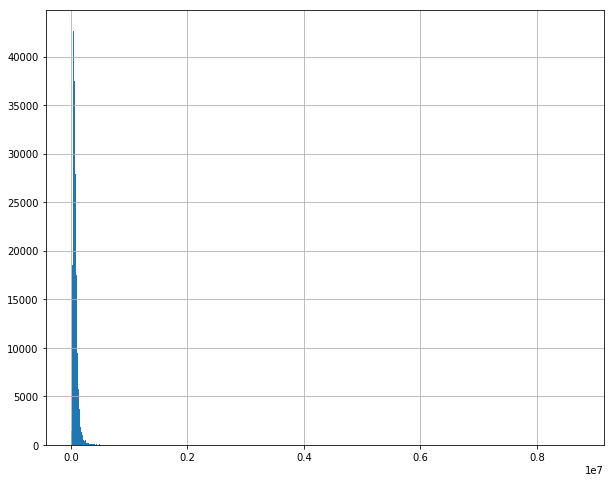

In [97]:
plt.figure(figsize=(10,8))
prep['Annual_Income'].hist(bins=500)

In [98]:
#Pivot tables helps in summarizing data in a easy way

#Credit_Score has some missing values, instead of replacing with same mean, we can calculate mean by Years_in_current_job,Home_Ownership and Purpose  variables


prep.pivot_table(values="Credit_Score",index=["Years_in_current_job","Home_Ownership","Purpose"],aggfunc=np.mean)

Credit_Score
Years_in_current_job Home_Ownership Purpose                           
0                    Home Mortgage  Business Loan           683.672876
                                    Buy House               699.069792
                                    Buy a Car               725.505372
                                    Debt Consolidation      706.811944
                                    Educational Expenses    619.250000
                                    Home Improvements       706.761517
                                    Medical Bills           680.790230
                                    Other                   715.084815
                                    Take a Trip             703.862500
                                    other                   700.718970
                     Own Home       Business Loan           667.482500
                                    Buy House               699.310714
                                    Buy a Car               732.075472
                                    Debt Consolidation      704.375825
                                    Educational Expenses    672.570000
                                    Home Improvements       704.054106
                                    Medical Bills           699.987500
                                    Other                   705.950427
                                    Take a Trip             679.990625
                                    other                   699.185429
                     Rent           Business Loan           681.691176
                                    Buy House               686.253289
                                    Buy a Car               711.559799
                                    Debt Consolidation      702.439976
                                    Educational Expenses    723.518182
                                    Home Improvements       713.317327
                                    Medical Bills           690.536397
                                    Other                   703.802057
                                    Take a Trip             699.185075
                                    other                   690.763423
...                                                                ...
10                   Home Mortgage  Business Loan           694.505336
                                    Buy House               683.297200
                                    Buy a Car               730.265252
                                    Debt Consolidation      709.428972
                                    Educational Expenses    737.100000
                                    Home Improvements       712.186843
                                    Medical Bills           695.436533
                                    Other                   720.896169
                                    Take a Trip             703.860131
                                    other                   700.545198
                     Own Home       Business Loan           686.094444
                                    Buy House               706.366667
                                    Buy a Car               717.588462
                                    Debt Consolidation      706.037453
                                    Educational Expenses    740.000000
                                    Home Improvements       707.942797
                                    Medical Bills           700.997115
                                    Other                   711.397993
                                    Take a Trip             707.060714
                                    other                   694.506667
                     Rent           Business Loan           662.115365
                                    Buy House               692.943293
                                    Buy a Car               709.029508
                                    Debt Consolidation      701.014065
           

In [99]:
# Multi Indexing

In [100]:
#Each index is made up with a combination of more than one value

# 1. For Credit_Sscore

In [101]:
impute_grps = prep.pivot_table(values="Credit_Score",index=["Years_in_current_job","Home_Ownership","Purpose"],aggfunc=np.mean)

#iterate only through rows with missing Credit Scoring
for i,row in prep.loc[prep['Credit_Score'].isnull(),:].iterrows():
  ind = tuple([row['Years_in_current_job'],row['Home_Ownership'],row['Purpose']])
  prep.loc[i,'Credit_Score'] = impute_grps.loc[ind].values[0]

In [102]:
prep.isnull().sum()

Loan_ID                              0
Customer_ID                          0
Loan_Status                          0
Current_Loan_Amount                  0
Term                                 0
Credit_Score                         1
Years_in_current_job                 0
Home_Ownership                       0
Annual_Income                    44498
Purpose                              0
Monthly_Debt                         0
Years_of_Credit_History              0
Months_since_last_delinquent    118262
Number_of_Open_Accounts              0
Number_of_Credit_Problems            0
Current_Credit_Balance               0
Maximum_Open_Credit                  0
Bankruptcies                       452
Tax_Liens                           22
Current_Loan_Amount_log              0
Current_Credit_Balance_log           0
Maximum_Open_Credit_log              0
Monthly_Debt_log                     0
dtype: int64

In [103]:
prep[pd.isnull(prep['Credit_Score'])]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,...,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Current_Loan_Amount_log,Current_Credit_Balance_log,Maximum_Open_Credit_log,Monthly_Debt_log
39864,3a0240e7-a657-4c55-b612-e176aac6bbda,5297be04-cc24-4a6e-9443-9ef78e5e5409,Fully Paid,2220.0,Short Term,NaN,7,Own Home,NaN,Educational Expenses,...,5,0,3809.0,4144.0,0.0,0.0,7.705713,8.245384,8.329658,6.408117


In [104]:
prep.Credit_Score.nunique()

841

In [105]:
prep_credit=prep[(prep['Years_in_current_job']==7)& (prep['Purpose']=='Educational Expenses')]

In [106]:
prep.iloc[:, 5] = prep.iloc[:, 5].fillna(prep_credit.mean(0)['Credit_Score'])

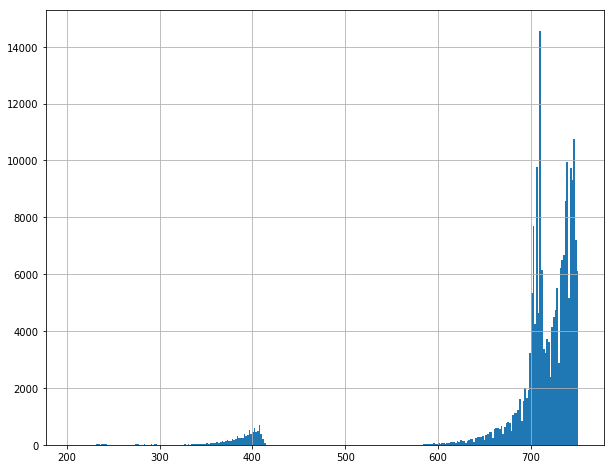

In [107]:
plt.figure(figsize=(10,8))
prep['Credit_Score'].hist(bins=300)

In [108]:
prep['Credit_Score_log']=np.log(prep['Credit_Score'])

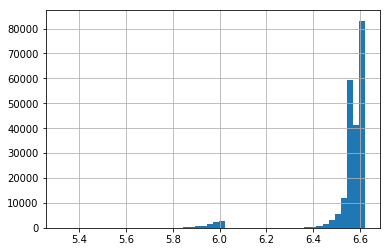

In [109]:
prep['Credit_Score_log'].hist(bins=50)

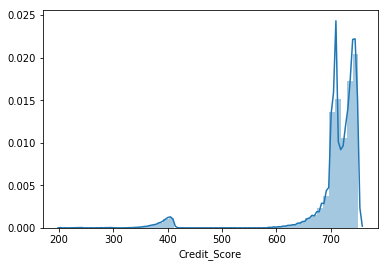

In [110]:
sns.distplot(prep['Credit_Score'])

# 2. For Annual_Income

In [111]:

prep.pivot_table(values="Annual_Income",index=["Years_in_current_job","Home_Ownership","Purpose"],aggfunc=np.mean)

Annual_Income
Years_in_current_job Home_Ownership Purpose                            
0                    Home Mortgage  Business Loan          88669.360566
                                    Buy House              83862.479167
                                    Buy a Car              60294.595041
                                    Debt Consolidation     71444.335750
                                    Educational Expenses   99275.666667
                                    Home Improvements      79755.495700
                                    Medical Bills          68916.252874
                                    Other                  75801.895062
                                    Take a Trip            62543.074074
                                    other                  64857.971897
                     Own Home       Business Loan          66613.700000
                                    Buy House              45099.000000
                                    Buy a Car              46518.792453
                                    Debt Consolidation     49332.696391
                                    Educational Expenses   55369.400000
                                    Home Improvements      55752.524960
                                    Medical Bills          48927.722222
                                    Other                  50656.713675
                                    Take a Trip            47413.625000
                                    other                  45565.045714
                     Rent           Business Loan          58495.682353
                                    Buy House              63263.539474
                                    Buy a Car              49218.231156
                                    Debt Consolidation     55437.840771
                                    Educational Expenses   35158.454545
                                    Home Improvements      62649.722772
                                    Medical Bills          50853.301471
                                    Other                  58052.660047
                                    Take a Trip            41111.626866
                                    other                  50187.843763
...                                                                 ...
10                   Home Mortgage  Business Loan         105557.836427
                                    Buy House              97854.584000
                                    Buy a Car              84174.490566
                                    Debt Consolidation     84448.951814
                                    Educational Expenses   99322.366667
                                    Home Improvements      95851.755298
                                    Medical Bills          90489.358101
                                    Other                  91744.829811
                                    Take a Trip            79694.183007
                                    other                  90061.967632
                     Own Home       Business Loan         107576.904762
                                    Buy House              87152.303030
                                    Buy a Car              80914.584615
                                    Debt Consolidation     72689.440888
                                    Educational Expenses   75750.000000
                                    Home Improvements      83824.776483
                                    Medical Bills          57589.673077
                                    Other                  78433.456204
                                    Take a Trip            67789.357143
                                    other                  74796.395322
                     Rent           Business Loan          83743.296875
                                    Buy House              79712.231707
                                    Buy a Car              71553.696721
                          

In [112]:
impute_grps_income = prep.pivot_table(values="Annual_Income",index=["Years_in_current_job","Home_Ownership","Purpose"],aggfunc=np.mean)

#iterate only through rows with missing Credit Scoring
for i,row in prep.loc[prep['Annual_Income'].isnull(),:].iterrows():
  ind2 = tuple([row['Years_in_current_job'],row['Home_Ownership'],row['Purpose']])
  prep.loc[i,'Annual_Income'] = impute_grps_income.loc[ind2].values[0]

In [113]:
prep_income=prep[pd.isnull(prep['Annual_Income'])]

In [114]:
prep_income=prep[(prep['Years_in_current_job']==7)& (prep['Purpose']=='Educational Expenses')]

In [115]:
prep.iloc[:, 8] = prep.iloc[:, 8].fillna(prep_income.mean(0)['Annual_Income'])

In [116]:
prep.isnull().sum()

Loan_ID                              0
Customer_ID                          0
Loan_Status                          0
Current_Loan_Amount                  0
Term                                 0
Credit_Score                         0
Years_in_current_job                 0
Home_Ownership                       0
Annual_Income                        0
Purpose                              0
Monthly_Debt                         0
Years_of_Credit_History              0
Months_since_last_delinquent    118262
Number_of_Open_Accounts              0
Number_of_Credit_Problems            0
Current_Credit_Balance               0
Maximum_Open_Credit                  0
Bankruptcies                       452
Tax_Liens                           22
Current_Loan_Amount_log              0
Current_Credit_Balance_log           0
Maximum_Open_Credit_log              0
Monthly_Debt_log                     0
Credit_Score_log                     0
dtype: int64

In [117]:
prep.Bankruptcies.value_counts()

0.0    192727
1.0     21506
2.0       818
3.0       155
4.0        25
5.0        13
6.0         3
7.0         1
Name: Bankruptcies, dtype: int64

In [118]:
prep.Bankruptcies.value_counts()[0]/prep.shape[0]

0.89349559573481685

In [119]:
# 89% People have not file bankruptcies

In [120]:
# Since we know that 89% people have not file bankrupcies, s0 we will be filling missiing values with mean values

In [121]:
prep.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,...,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Current_Loan_Amount_log,Current_Credit_Balance_log,Maximum_Open_Credit_log,Monthly_Debt_log,Credit_Score_log
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520.0,Short Term,741.0,10,Home Mortgage,33694.0,Debt Consolidation,...,0,6760.0,16056.0,0.0,0.0,9.351927,8.818926,9.683900,6.371663,6.608001
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441.0,Short Term,734.0,4,Home Mortgage,42269.0,other,...,0,6262.0,19149.0,0.0,0.0,8.143808,8.742415,9.860058,7.009445,6.598509
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029.0,Short Term,747.0,10,Home Mortgage,90126.0,Debt Consolidation,...,0,20967.0,28335.0,0.0,0.0,9.953705,9.950753,10.251888,7.187544,6.616065
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743.0,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,...,0,22529.0,43915.0,0.0,0.0,9.838629,10.022603,10.690034,6.623959,6.616065
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731.0,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,...,0,17391.0,37081.0,0.0,0.0,9.370075,9.763766,10.520887,5.875436,6.614726


In [122]:
prep.iloc[:, 17] = prep.iloc[:, 17].fillna(prep['Bankruptcies'].mean())

In [123]:
prep.iloc[:, 18] = prep.iloc[:, 18].fillna(prep['Tax_Liens'].mean())

In [124]:
prep.isnull().sum()

Loan_ID                              0
Customer_ID                          0
Loan_Status                          0
Current_Loan_Amount                  0
Term                                 0
Credit_Score                         0
Years_in_current_job                 0
Home_Ownership                       0
Annual_Income                        0
Purpose                              0
Monthly_Debt                         0
Years_of_Credit_History              0
Months_since_last_delinquent    118262
Number_of_Open_Accounts              0
Number_of_Credit_Problems            0
Current_Credit_Balance               0
Maximum_Open_Credit                  0
Bankruptcies                         0
Tax_Liens                            0
Current_Loan_Amount_log              0
Current_Credit_Balance_log           0
Maximum_Open_Credit_log              0
Monthly_Debt_log                     0
Credit_Score_log                     0
dtype: int64

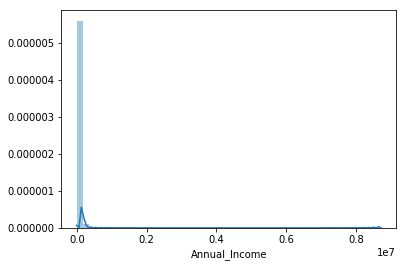

In [125]:
sns.distplot(prep['Annual_Income'])

In [126]:
prep['Annual_Income_log']=np.log(prep['Annual_Income']+1)

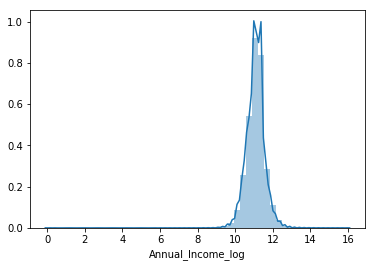

In [127]:
sns.distplot(prep['Annual_Income_log'])

In [128]:
prep1=prep.copy()

In [129]:
prep1.to_csv('Loan_prep.csv', sep=',')

In [130]:
prep1.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount             float64
Term                             object
Credit_Score                    float64
Years_in_current_job             object
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance          float64
Maximum_Open_Credit             float64
Bankruptcies                    float64
Tax_Liens                       float64
Current_Loan_Amount_log         float64
Current_Credit_Balance_log      float64
Maximum_Open_Credit_log         float64
Monthly_Debt_log                float64
Credit_Score_log                float64
Annual_Income_log               float64


In [131]:
prep1=prep1.drop(['Credit_Score_log','Annual_Income','Current_Credit_Balance','Maximum_Open_Credit','Monthly_Debt','Current_Loan_Amount_log'],axis=1)

In [132]:
prep1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 19 columns):
Loan_ID                         215700 non-null object
Customer_ID                     215700 non-null object
Loan_Status                     215700 non-null object
Current_Loan_Amount             215700 non-null float64
Term                            215700 non-null object
Credit_Score                    215700 non-null float64
Years_in_current_job            215700 non-null object
Home_Ownership                  215700 non-null object
Purpose                         215700 non-null object
Years_of_Credit_History         215700 non-null float64
Months_since_last_delinquent    97438 non-null float64
Number_of_Open_Accounts         215700 non-null int64
Number_of_Credit_Problems       215700 non-null int64
Bankruptcies                    215700 non-null float64
Tax_Liens                       215700 non-null float64
Current_Credit_Balance_log      215700 non-null float64
Maxim

In [133]:
prep1=prep1.drop(['Loan_ID','Customer_ID','Months_since_last_delinquent'],axis=1)

In [134]:
prep1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 16 columns):
Loan_Status                   215700 non-null object
Current_Loan_Amount           215700 non-null float64
Term                          215700 non-null object
Credit_Score                  215700 non-null float64
Years_in_current_job          215700 non-null object
Home_Ownership                215700 non-null object
Purpose                       215700 non-null object
Years_of_Credit_History       215700 non-null float64
Number_of_Open_Accounts       215700 non-null int64
Number_of_Credit_Problems     215700 non-null int64
Bankruptcies                  215700 non-null float64
Tax_Liens                     215700 non-null float64
Current_Credit_Balance_log    215700 non-null float64
Maximum_Open_Credit_log       215700 non-null float64
Monthly_Debt_log              215700 non-null float64
Annual_Income_log             215700 non-null float64
dtypes: float64(9), int64(2), obje

In [135]:
prep1['Bankruptcies'] = prep1['Bankruptcies'].astype('object')
prep1['Tax_Liens'] = prep1['Tax_Liens'].astype('object')
prep1['Number_of_Open_Accounts'] = prep1['Number_of_Open_Accounts'].astype('object')
prep1['Number_of_Credit_Problems'] = prep1['Number_of_Credit_Problems'].astype('object')

In [136]:
prep1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 16 columns):
Loan_Status                   215700 non-null object
Current_Loan_Amount           215700 non-null float64
Term                          215700 non-null object
Credit_Score                  215700 non-null float64
Years_in_current_job          215700 non-null object
Home_Ownership                215700 non-null object
Purpose                       215700 non-null object
Years_of_Credit_History       215700 non-null float64
Number_of_Open_Accounts       215700 non-null object
Number_of_Credit_Problems     215700 non-null object
Bankruptcies                  215700 non-null object
Tax_Liens                     215700 non-null object
Current_Credit_Balance_log    215700 non-null float64
Maximum_Open_Credit_log       215700 non-null float64
Monthly_Debt_log              215700 non-null float64
Annual_Income_log             215700 non-null float64
dtypes: float64(7), object(9)
memo

In [137]:
prep1.Loan_Status.value_counts()

Fully Paid     176191
Charged Off     39509
Name: Loan_Status, dtype: int64

In [138]:
lib={'Fully Paid':0,'Charged Off':1 }
prep1.Loan_Status=prep1.Loan_Status.map(lib)

# Get Dummies for Categorical Variable

In [139]:
dummy=prep1.copy()

In [140]:
dummy=dummy.drop(['Loan_Status'],axis=1)

In [141]:
dummy=pd.get_dummies(dummy,drop_first=True)

In [142]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Columns: 118 entries, Current_Loan_Amount to Tax_Liens_11.0
dtypes: float64(7), uint8(111)
memory usage: 34.4 MB


# Modeling

In [143]:
X=dummy.copy()
Y=prep1['Loan_Status']

In [144]:
X.shape, Y.shape

((215700, 118), (215700,))

# Train_test_split 

In [145]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cross_validation import train_test_split as tts
x_train, x_val, y_train, y_val = tts(X,Y, train_size = 0.8, stratify=Y,
                                      random_state=42)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

/Users/SKYLER/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((172560, 118), (43140, 118), (172560,), (43140,))

In [146]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

0    0.816835
1    0.183165
Name: Loan_Status, dtype: float64
0    0.816829
1    0.183171
Name: Loan_Status, dtype: float64


# Oversampling By SMOTE

In [147]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, ratio =1.0)
X_train_res, Y_train_res = sm.fit_sample(x_train,y_train)
X_train_res.shape, Y_train_res.shape

/Users/SKYLER/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


((281906, 118), (281906,))

In [148]:
y_train.value_counts(), np.bincount(Y_train_res)

(0    140953
 1     31607
 Name: Loan_Status, dtype: int64, array([140953, 140953]))

In [162]:
y_val.value_counts()

0    35238
1     7902
Name: Loan_Status, dtype: int64

# Modeling

In [149]:
def Metrics(y_val,pred):
    print('accuray:', accuracy_score(y_val,pred),',recall score:',recall_score(y_val,pred),'\n ConfusionMatrix: \n',confusion_matrix(y_val,pred))
    #model_rf.feature_importances_
    print('Precision Score:',precision_score(y_val,pred),'F1_score:',f1_score(y_val,pred))

# Randomforest

In [164]:
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier #Random Forest

rf = RandomForestClassifier(n_estimators=300, min_samples_split=5, \
                            max_depth=35,random_state=42)
model_rf = rf.fit(X_train_res,Y_train_res)
pred_rf = model_rf.predict(x_val)
Metrics(y_val,pred_rf)

accuray: 0.860315252666 ,recall score: 0.296254112883 
 ConfusionMatrix: 
 [[34773   465]
 [ 5561  2341]]
Precision Score: 0.834283677833 F1_score: 0.437243182667


# Feature Importance -Randomforest

In [167]:
import pandas as pd
feature_importance_rf = pd.DataFrame(rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [168]:
feature_importance_rf[0:10]

,importance
Credit_Score,0.150570
Current_Loan_Amount,0.099099
Home_Ownership_Rent,0.090088
Term_Short Term,0.071886
Years_in_current_job_10,0.065894
Annual_Income_log,0.046023
Purpose_Debt Consolidation,0.038694
Maximum_Open_Credit_log,0.024414
Number_of_Open_Accounts_9,0.024163
Years_in_current_job_2,0.023565


In [165]:
precision=precision_score(y_val,pred_rf)

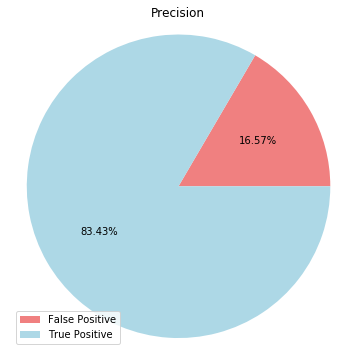

In [169]:
# Data to plot# Data t 
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

# Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression #logistic regression
model = LogisticRegression()
model.fit(X_train_res,Y_train_res)
prediction1=model.predict(x_val)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1,y_val))

The accuracy of the Logistic Regression is 0.716944830783


# Gradient Boosting

In [153]:
from sklearn.ensemble import GradientBoostingClassifier 
g_clf = GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,max_depth=5)
g_clf.fit(X_train_res,Y_train_res)
pred_g=g_clf.predict(x_val)
Metrics(y_val,pred_g)

accuray: 0.855771905424 ,recall score: 0.319412806884 
 ConfusionMatrix: 
 [[34394   844]
 [ 5378  2524]]
Precision Score: 0.749406175772 F1_score: 0.447914818101


# Feature Importance -Gradient Boosting

In [155]:
import pandas as pd
feature_importances_gb = pd.DataFrame(g_clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [156]:
feature_importances_gb[0:10]

,importance
Credit_Score,0.128421
Current_Loan_Amount,0.108862
Annual_Income_log,0.098132
Monthly_Debt_log,0.071543
Maximum_Open_Credit_log,0.071474
Years_of_Credit_History,0.067121
Current_Credit_Balance_log,0.042145
Years_in_current_job_10,0.031468
Home_Ownership_Rent,0.025930
Term_Short Term,0.017563


In [170]:
list(prep1.head())

['Loan_Status',
 'Current_Loan_Amount',
 'Term',
 'Credit_Score',
 'Years_in_current_job',
 'Home_Ownership',
 'Purpose',
 'Years_of_Credit_History',
 'Number_of_Open_Accounts',
 'Number_of_Credit_Problems',
 'Bankruptcies',
 'Tax_Liens',
 'Current_Credit_Balance_log',
 'Maximum_Open_Credit_log',
 'Monthly_Debt_log',
 'Annual_Income_log']